In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial, jacrev
import ticktack
from ticktack import fitting_tinygp as fitting
from tqdm import tqdm
import scipy

rcParams['figure.figsize'] = (8.0, 4.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject_recovery_gp.csv')
cf.prepare_function(use_control_points=True, interp='gp')

In [3]:
@jit
def gauss(t):
    prod =  1.87 + 0.2 * 1.87 * jnp.exp(-1/2*((t-250)/10)**2.)
    return prod

In [4]:
cf.offset

DeviceArray(-0.44436304, dtype=float64)

In [5]:
cf.offset = 0
cf.offset

0

In [6]:
params = jnp.array([1.87002943, 1.86805214, 1.86999604, 1.87108185, 1.86972864,
       1.86888666, 1.86947976, 1.87003006, 1.87040158, 1.87061446,
       1.87061749, 1.87049914, 1.8703806 , 1.87033124, 1.87036837,
       1.87053152, 1.8708518 , 1.87134645, 1.87202733, 1.87293555,
       1.874114  , 1.87561136, 1.87750411, 1.87989524, 1.88287836,
       1.88658263, 1.89114025, 1.89669193, 1.90338461, 1.91135135,
       1.92071715, 1.93160632, 1.94409556, 1.9582442 , 1.97407275,
       1.99152143, 2.01046616, 2.03075372, 2.05215628, 2.07435282,
       2.09695777, 2.11955487, 2.14167901, 2.16282861, 2.1824795 ,
       2.20012114, 2.21529847, 2.22758902, 2.23662495, 2.24215204,
       2.24401406, 2.24214951, 2.23660382, 2.22754363, 2.21525893,
       2.20009023, 2.18243101, 2.16276715, 2.14162675, 2.11951094,
       2.09691641, 2.07431315, 2.05212886, 2.03073745, 2.01044763,
       1.99150002, 1.97406826, 1.95825667, 1.94410212, 1.93159494,
       1.92069886, 1.91132491, 1.90335166, 1.8966525 , 1.89110007,
       1.88653945, 1.88283755, 1.87987414, 1.87752412, 1.87566853,
       1.87421958, 1.87310803, 1.87226316, 1.87162376, 1.87115503,
       1.87081471, 1.87056803, 1.87040366, 1.87029994, 1.87021804,
       1.87013871, 1.87003578, 1.86989402, 1.86974339, 1.86965345,
       1.8698085 , 1.87045018, 1.87111692])

In [7]:
print("total likelihood: ", cf.gp_likelihood(params))
print("gp likelihood: ", cf.gp_neg_log_likelihood(params))
print("chi2: ", cf.loss_chi2(params))

total likelihood:  57.53803950987396
gp likelihood:  57.53790465205109
chi2:  0.00013485782287319217


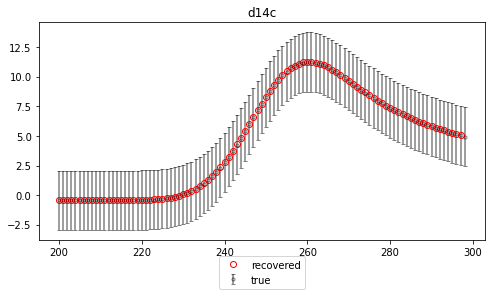

In [8]:
plt.plot(cf.time_data[:-1], cf.dc14(params), "or", fillstyle="none", label="recovered")
plt.errorbar(cf.time_data, cf.d14c_data, yerr=cf.d14c_data_error, fmt='.k', fillstyle="none", capsize=2, 
             label="true", alpha=0.5)
plt.title("d14c");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True)

In [9]:
%%time
jacrev(cf.gp_likelihood)(params)

CPU times: user 2min 26s, sys: 5min 10s, total: 7min 37s
Wall time: 1min 4s


DeviceArray([1.28888251, 0.0233084 , 0.02567869, 0.02835479, 0.02592828,
             0.02570202, 0.02843856, 0.0295413 , 0.03193848, 0.03315423,
             0.03400678, 0.03396706, 0.03360668, 0.03303847, 0.03252017,
             0.03229071, 0.03244069, 0.03306894, 0.03407322, 0.03547815,
             0.03714065, 0.03902935, 0.04100701, 0.04316378, 0.04535574,
             0.04773214, 0.05026148, 0.05306344, 0.05618324, 0.05973821,
             0.06372682, 0.06832405, 0.07348348, 0.07930644, 0.08578391,
             0.09291598, 0.10057737, 0.10877054, 0.11736225, 0.12624142,
             0.13519191, 0.14410313, 0.15275518, 0.16097201, 0.16854226,
             0.17524212, 0.1809381 , 0.18547597, 0.18867557, 0.19048901,
             0.19085249, 0.1897387 , 0.18718916, 0.18322425, 0.17803615,
             0.17171293, 0.16439266, 0.15625167, 0.14756947, 0.13845575,
             0.12915953, 0.11982066, 0.11062671, 0.10171383, 0.09321679,
             0.08522358, 0.0778175 , 0.07102558, 0.